In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

In [ ]:
d = 100 # dimensions of data
n = 1000 # number of data points

In [ ]:
np.random.seed(42)
hf_train_sz = int(0.8 * n//2)

X_pos = np.random.normal(size=(n//2, d))
X_pos = X_pos + .12

X_neg = np.random.normal(size=(n//2, d))
X_neg = X_neg - .12

X_train = np.concatenate([X_pos[:hf_train_sz],
                          X_neg[:hf_train_sz]])
X_test = np.concatenate([X_pos[hf_train_sz:],
                         X_neg[hf_train_sz:]])

y_train = np.concatenate([np.ones(hf_train_sz),
                          -1 * np.ones(hf_train_sz)])
y_test = np.concatenate([np.ones(n//2 - hf_train_sz),
                         -1 * np.ones(n//2 - hf_train_sz)])

In [ ]:
# Problem 4.1
# Ref: https://en.wikipedia.org/wiki/Sigmoid_function
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [ ]:
# Problem 4.1 and 4.2
# Ref: https://www.baeldung.com/cs/gradient-descent-logistic-regression
def sgd(w, X, y, X_te, y_te, step_sz, steps):
    def logistic_loss(w, x_i, y_i):
      loss = np.log(1 + np.exp(-y_i * w.dot(x_i)))
      return loss

    def calculate_0_1_loss(w, x_i, y_i):
      y_prob = sigmoid(w.dot(x_i))
      y_pred = 1 if y_prob > 0.5 else -1
      loss = 0 if y_pred == y_i else 1
      return loss

    tr_obj_vals = np.empty(steps)
    obj_vals = np.empty(steps)

    loss01_vals = np.empty(steps)
    tr_loss01_vals = np.empty(steps)

    num_train, num_test = X.shape[0], X_te.shape[0]
    for i in range(steps):
      # Picks a random data point
      random_index = np.random.randint(num_train)
      x_i = X[random_index]
      y_i = y[random_index]

      # gradient = (sigmoid(wT * x_i) - y_i) * x_i
      y_prob = sigmoid(w.dot(x_i))
      diff = y_prob - y_i
      gradient = diff * x_i

      # Updates w: w_new = w - step_size * gradient
      w -= step_sz * gradient

      # Calculates the average logistic loss for the training set
      train_logistic_loss = np.mean([logistic_loss(w, X[i], y[i]) for i in range(num_train)])
      tr_obj_vals[i] = train_logistic_loss

      # Calculates the average logistic loss for the testing set
      test_logistic_loss = np.mean([logistic_loss(w, X_te[i], y_te[i]) for i in range(num_test)])
      obj_vals[i] = test_logistic_loss

      # Calculates 0-1 loss for the training set
      train_loss01 = np.mean([calculate_0_1_loss(w, X[i], y[i]) for i in range(num_train)])
      tr_loss01_vals[i] = train_loss01

      # Calculates 0-1 loss for the testing set
      test_loss01 = np.mean([calculate_0_1_loss(w, X_te[i], y_te[i]) for i in range(num_test)])
      loss01_vals[i] = test_loss01

    # tr_loss01_vals = None  # You may also want to plot this for sanity check
    return tr_obj_vals, obj_vals, loss01_vals, tr_loss01_vals  # Return statement for part 4.2

In [ ]:
tr_obj_vals1, obj_vals1, loss01_vals1, tr_loss01_vals1 = sgd(np.zeros(d), X_train, y_train, X_test, y_test,
                                                             0.0005, 5000)
tr_obj_vals2, obj_vals2, loss01_vals2, tr_loss01_vals2 = sgd(np.zeros(d), X_train, y_train, X_test, y_test,
                                                             0.005, 5000)
tr_obj_vals3, obj_vals3, loss01_vals3, tr_loss01_vals3 = sgd(np.zeros(d), X_train, y_train, X_test, y_test,
                                                             0.05, 5000)

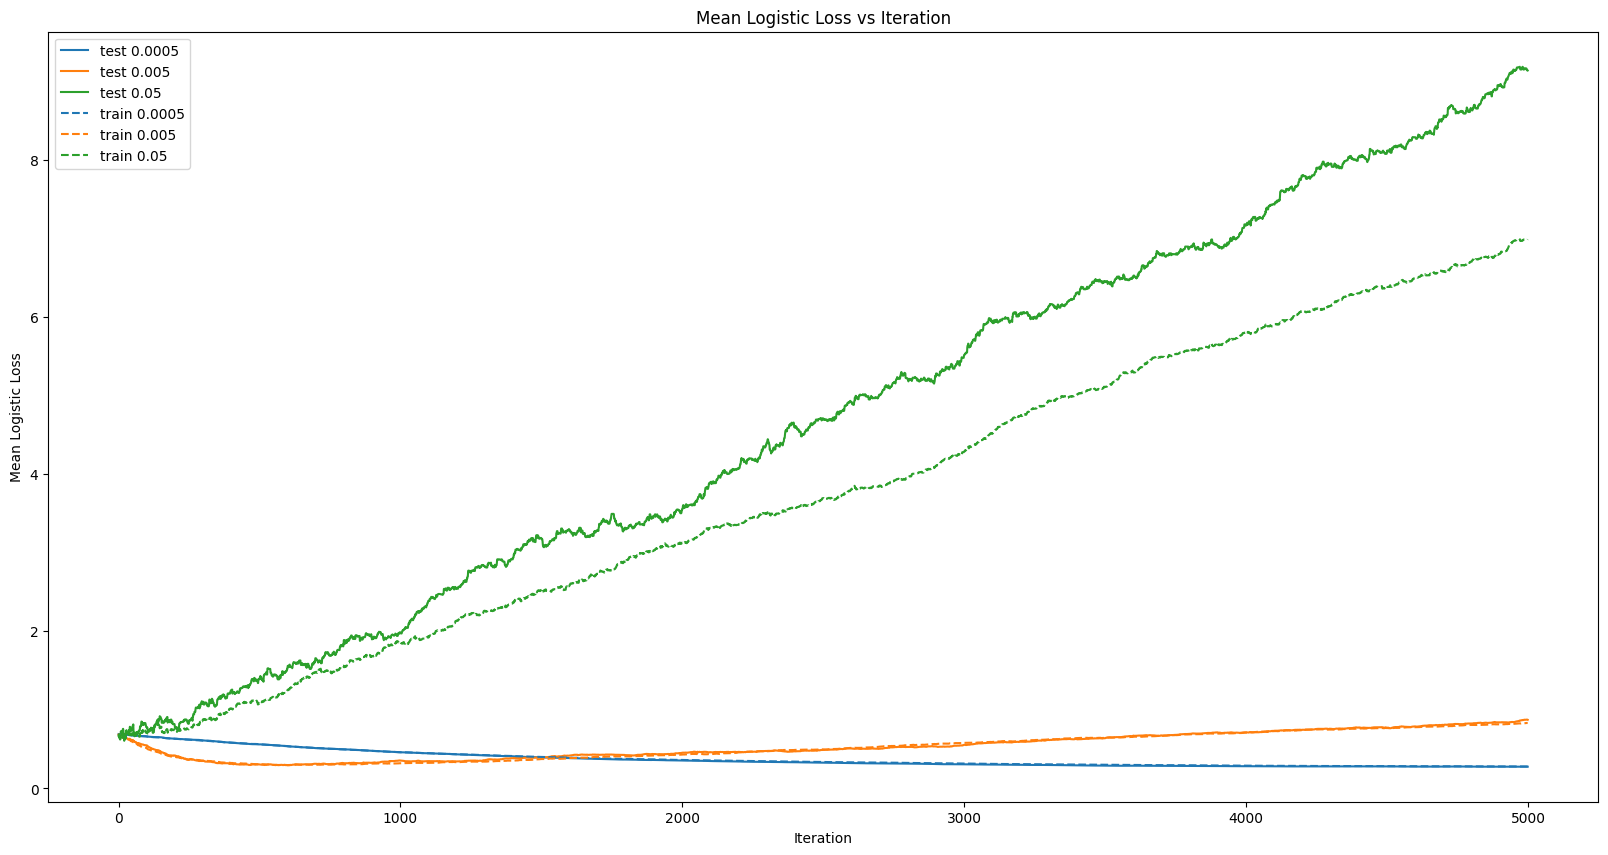

In [ ]:
plt.plot(np.arange(5000), obj_vals1, label="test 0.0005")
plt.plot(np.arange(5000), obj_vals2, label="test 0.005")
plt.plot(np.arange(5000), obj_vals3, label="test 0.05")

plt.plot(np.arange(5000), tr_obj_vals1, '--', color='#1f77b4', label="train 0.0005")
plt.plot(np.arange(5000), tr_obj_vals2, '--', color='#ff7f0e', label="train 0.005")
plt.plot(np.arange(5000), tr_obj_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("Mean Logistic Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('Mean Logistic Loss')
# plt.ylim(bottom=0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()

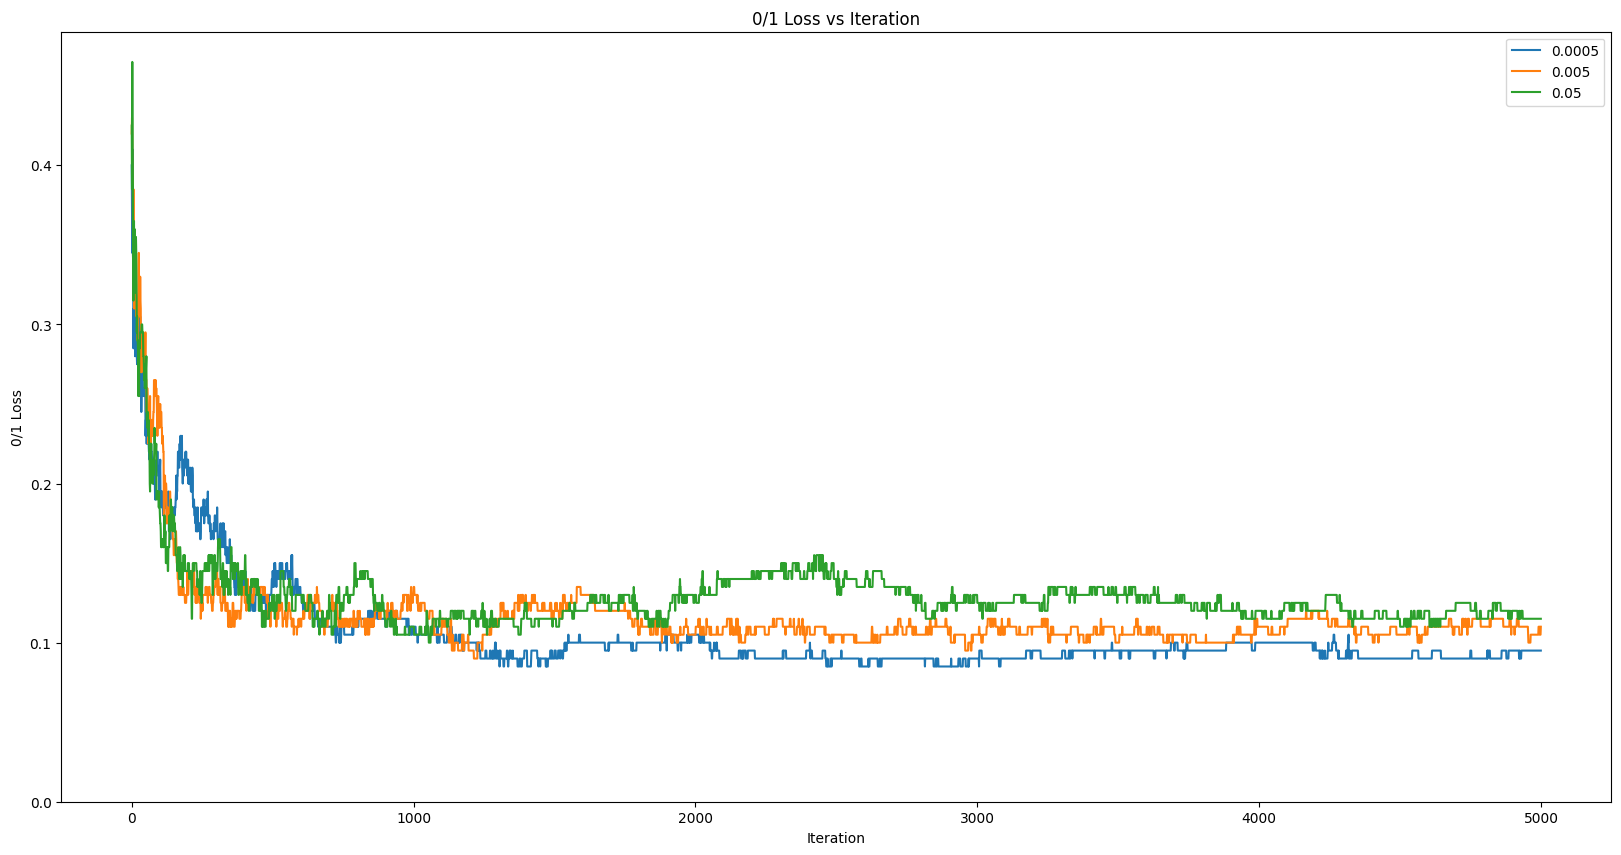

In [ ]:
plt.plot(np.arange(5000), loss01_vals1, label="0.0005")
plt.plot(np.arange(5000), loss01_vals2, label="0.005")
plt.plot(np.arange(5000), loss01_vals3, label="0.05")

# plt.plot(np.arange(5000), tr_loss01_vals1, '--', color='#1f77b4', label="train 0.0005")
# plt.plot(np.arange(5000), tr_loss01_vals2, '--', color='#ff7f0e', label="train 0.005")
# plt.plot(np.arange(5000), tr_loss01_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("0/1 Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('0/1 Loss')
plt.ylim(bottom=0)
# plt.ylim(bottom=0.5, top=1.0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()

In [ ]:
loss01_vals1[-1], loss01_vals2[-1], loss01_vals3[-1]

(0.095, 0.11, 0.115)